In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Create Latitude and Longitude Combinations

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# import citypy module.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [7]:
cities

['avarua',
 'carnarvon',
 'khatanga',
 'taolanaro',
 'axim',
 'yakeshi',
 'longlac',
 'bairiki',
 'karaul',
 'rikitea',
 'aklavik',
 'qaanaaq',
 'bathsheba',
 'bundaberg',
 'guarapari',
 'atuona',
 'davila',
 'narsaq',
 'pimentel',
 'stoyba',
 'ushuaia',
 'yulara',
 'busselton',
 'amderma',
 'arroyo',
 'bhopal',
 'muros',
 'albany',
 'tingloy',
 'killybegs',
 'port alfred',
 'yellowknife',
 'lagoa',
 'chunoyar',
 'kiama',
 'kavieng',
 'pedernales',
 'punta arenas',
 'samusu',
 'butaritari',
 'ponta do sol',
 'kandrian',
 'saldanha',
 'baiyin',
 'torbay',
 'baruun-urt',
 'mahebourg',
 'bluff',
 'galesong',
 'san patricio',
 'vila velha',
 'gizo',
 'pavlodar',
 'santa isabel',
 'sechura',
 'nangong',
 'kysyl-syr',
 'hobart',
 'illoqqortoormiut',
 'vaitupu',
 'cherskiy',
 'kavaratti',
 'tsihombe',
 'kristiinankaupunki',
 'whitehorse',
 'georgetown',
 'rocha',
 'mys shmidta',
 'saleaula',
 'sorvag',
 'chokurdakh',
 'batticaloa',
 'chom bung',
 'ampanihy',
 'castro',
 'batalha',
 'giubega',

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7f07098b91c2a954fd3ee3795613a33a


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    ## Handle API Request Errors with try-except Blocks
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | axim
Processing Record 6 of Set 1 | yakeshi
Processing Record 7 of Set 1 | longlac
City not found. Skipping...
Processing Record 8 of Set 1 | bairiki
Processing Record 9 of Set 1 | karaul
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | bundaberg
Processing Record 15 of Set 1 | guarapari
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | davila
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | pimentel
Processing Record 20 of Set 1 | stoyba
City not found. Skipping...
Processing Record 21 of Set 1 | us

Processing Record 35 of Set 4 | nanhai
Processing Record 36 of Set 4 | faanui
Processing Record 37 of Set 4 | ostrovnoy
Processing Record 38 of Set 4 | fairbanks
Processing Record 39 of Set 4 | tosham
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | torres
Processing Record 42 of Set 4 | suoyarvi
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | dunedin
Processing Record 45 of Set 4 | pangnirtung
Processing Record 46 of Set 4 | sao filipe
Processing Record 47 of Set 4 | isangel
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | atherton
Processing Record 50 of Set 4 | antoniny
Processing Record 1 of Set 5 | bredasdorp
Processing Record 2 of Set 5 | batagay
Processing Record 3 of Set 5 | kargasok
Processing Record 4 of Set 5 | salta
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | cantaura
Processing Record 7 of Set 5 | novyy buyan
Processing Record 8 of Set 5 | halalo
City not found. Skippi

Processing Record 27 of Set 8 | klaksvik
Processing Record 28 of Set 8 | nogliki
Processing Record 29 of Set 8 | euskirchen
Processing Record 30 of Set 8 | buariki
City not found. Skipping...
Processing Record 31 of Set 8 | labrea
Processing Record 32 of Set 8 | khash
Processing Record 33 of Set 8 | coihaique
Processing Record 34 of Set 8 | rawson
Processing Record 35 of Set 8 | nederweert
Processing Record 36 of Set 8 | souillac
Processing Record 37 of Set 8 | sijunjung
Processing Record 38 of Set 8 | bielsk podlaski
Processing Record 39 of Set 8 | lensk
Processing Record 40 of Set 8 | kharp
Processing Record 41 of Set 8 | lasa
Processing Record 42 of Set 8 | tekeli
Processing Record 43 of Set 8 | tiznit
Processing Record 44 of Set 8 | fatezh
Processing Record 45 of Set 8 | darnah
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | port lincoln
Processing Record 48 of Set 8 | geraldton
Processing Record 49 of Set 8 | dole
Processing Record 50 of Set 8 | opuwo
Proc

Processing Record 19 of Set 12 | morros
Processing Record 20 of Set 12 | la libertad
Processing Record 21 of Set 12 | cayenne
Processing Record 22 of Set 12 | itapirapua
Processing Record 23 of Set 12 | tommot
Processing Record 24 of Set 12 | rodrigues alves
Processing Record 25 of Set 12 | mizusawa
Processing Record 26 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 27 of Set 12 | mawlaik
Processing Record 28 of Set 12 | mapiripan
Processing Record 29 of Set 12 | kedougou
Processing Record 30 of Set 12 | santa rosalia
Processing Record 31 of Set 12 | shahrud
Processing Record 32 of Set 12 | naryan-mar
Processing Record 33 of Set 12 | krasnoselkup
Processing Record 34 of Set 12 | mount isa
Processing Record 35 of Set 12 | innisfail
Processing Record 36 of Set 12 | roald
Processing Record 37 of Set 12 | henties bay
Processing Record 38 of Set 12 | avera
Processing Record 39 of Set 12 | tucuman
Processing Record 40 of Set 12 | okha
Processing Record 41 of Set 12 |

In [13]:
## Handle API Request Errors with try-except Blocks

In [14]:
# try:
#   Do something
# except:
#   print("An exception occurred")

In [17]:
len(city_data)

550

In [18]:
city_data

[{'City': 'Avarua',
  'Lat': -21.2078,
  'Lng': -159.775,
  'Max Temp': 77.05,
  'Humidity': 83,
  'Cloudiness': 90,
  'Wind Speed': 2.3,
  'Country': 'CK',
  'Date': '2021-12-09 18:44:01'},
 {'City': 'Carnarvon',
  'Lat': -24.8667,
  'Lng': 113.6333,
  'Max Temp': 71.67,
  'Humidity': 78,
  'Cloudiness': 90,
  'Wind Speed': 19.57,
  'Country': 'AU',
  'Date': '2021-12-09 18:47:55'},
 {'City': 'Khatanga',
  'Lat': 71.9667,
  'Lng': 102.5,
  'Max Temp': -6.47,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 10.87,
  'Country': 'RU',
  'Date': '2021-12-09 18:47:55'},
 {'City': 'Axim',
  'Lat': 4.8699,
  'Lng': -2.2405,
  'Max Temp': 81.05,
  'Humidity': 81,
  'Cloudiness': 6,
  'Wind Speed': 9.06,
  'Country': 'GH',
  'Date': '2021-12-09 18:47:55'},
 {'City': 'Yakeshi',
  'Lat': 49.2833,
  'Lng': 120.7333,
  'Max Temp': 7.34,
  'Humidity': 97,
  'Cloudiness': 100,
  'Wind Speed': 3.38,
  'Country': 'CN',
  'Date': '2021-12-09 18:47:56'},
 {'City': 'Bairiki',
  'Lat': 1.3292,
  'Ln

In [19]:
## Create a DataFrame of City Weather Data (6.2.7)

In [20]:
# we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,77.05,83,90,2.30,CK,2021-12-09 18:44:01
1,Carnarvon,-24.8667,113.6333,71.67,78,90,19.57,AU,2021-12-09 18:47:55
2,Khatanga,71.9667,102.5000,-6.47,96,100,10.87,RU,2021-12-09 18:47:55
3,Axim,4.8699,-2.2405,81.05,81,6,9.06,GH,2021-12-09 18:47:55
4,Yakeshi,49.2833,120.7333,7.34,97,100,3.38,CN,2021-12-09 18:47:56
5,Bairiki,1.3292,172.9752,80.60,89,40,4.61,KI,2021-12-09 18:47:56
6,Rikitea,-23.1203,-134.9692,75.45,73,64,21.54,PF,2021-12-09 18:47:56
7,Aklavik,68.2191,-135.0107,2.23,84,20,3.44,CA,2021-12-09 18:47:57
8,Qaanaaq,77.4840,-69.3632,0.61,80,30,6.91,GL,2021-12-09 18:47:57
9,Bathsheba,13.2167,-59.5167,84.81,65,40,21.85,BB,2021-12-09 18:47:57


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-12-09 18:44:01,-21.2078,-159.7750,77.05,83,90,2.30
1,Carnarvon,AU,2021-12-09 18:47:55,-24.8667,113.6333,71.67,78,90,19.57
2,Khatanga,RU,2021-12-09 18:47:55,71.9667,102.5000,-6.47,96,100,10.87
3,Axim,GH,2021-12-09 18:47:55,4.8699,-2.2405,81.05,81,6,9.06
4,Yakeshi,CN,2021-12-09 18:47:56,49.2833,120.7333,7.34,97,100,3.38
5,Bairiki,KI,2021-12-09 18:47:56,1.3292,172.9752,80.60,89,40,4.61
6,Rikitea,PF,2021-12-09 18:47:56,-23.1203,-134.9692,75.45,73,64,21.54
7,Aklavik,CA,2021-12-09 18:47:57,68.2191,-135.0107,2.23,84,20,3.44
8,Qaanaaq,GL,2021-12-09 18:47:57,77.4840,-69.3632,0.61,80,30,6.91
9,Bathsheba,BB,2021-12-09 18:47:57,13.2167,-59.5167,84.81,65,40,21.85


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
### PLOT WEATHER DATA

In [33]:
## Plot Latitude vs. Temperature (6.3.1)

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

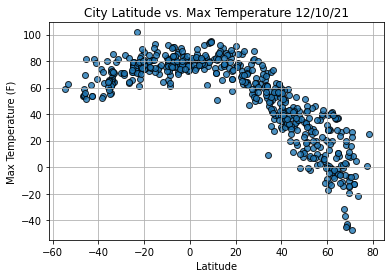

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [37]:
## Plot Latitude vs. Humidity

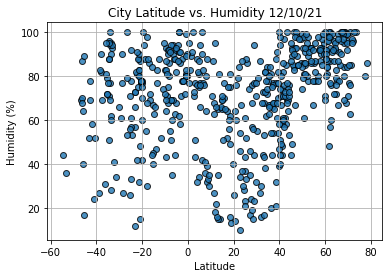

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

In [40]:
## Plot Latitude vs. Cloudiness

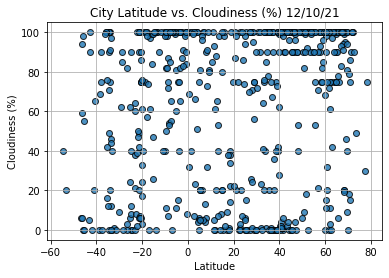

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [42]:
## Plot Latitude vs. Wind Speed

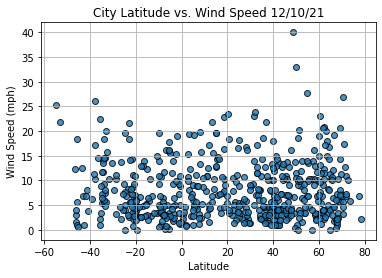

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [44]:
### Linear Regression

In [45]:
## Find the Correlation Between Latitude and Maximum Temperature (6.4.2)

In [46]:
# Create a Linear Regression Function

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
# Create the Hemisphere DataFrames

In [50]:
index13 = city_data_df.loc[13]
index13

City                       Davila
Lat                       18.4726
Lng                      120.5763
Max Temp                    66.18
Humidity                       75
Cloudiness                     14
Wind Speed                  22.86
Country                        PH
Date          2021-12-09 18:47:58
Name: 13, dtype: object

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Khatanga,71.9667,102.5000,-6.47,96,100,10.87,RU,2021-12-09 18:47:55
3,Axim,4.8699,-2.2405,81.05,81,6,9.06,GH,2021-12-09 18:47:55
4,Yakeshi,49.2833,120.7333,7.34,97,100,3.38,CN,2021-12-09 18:47:56
5,Bairiki,1.3292,172.9752,80.60,89,40,4.61,KI,2021-12-09 18:47:56
7,Aklavik,68.2191,-135.0107,2.23,84,20,3.44,CA,2021-12-09 18:47:57


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [55]:
## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

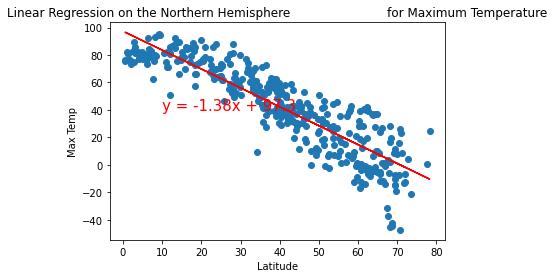

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [57]:
## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

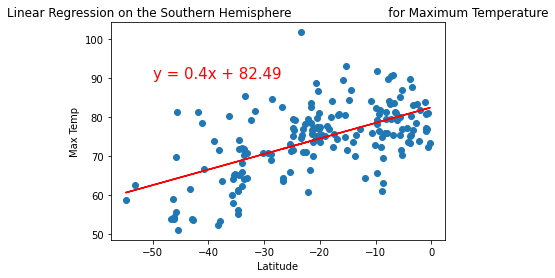

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [61]:
## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

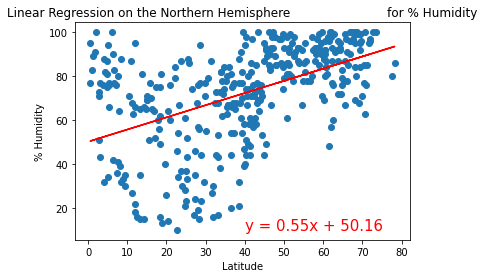

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [63]:
## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

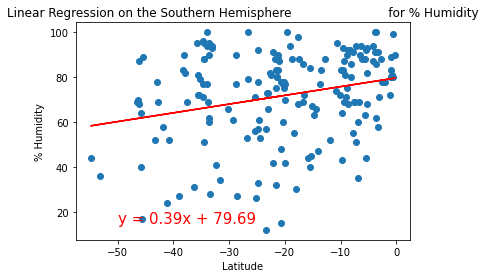

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [68]:
## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

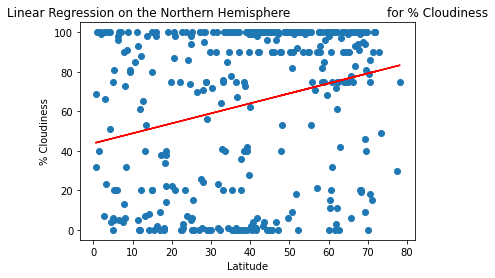

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [70]:
## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

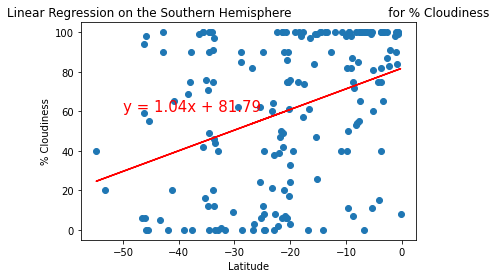

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [75]:
## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

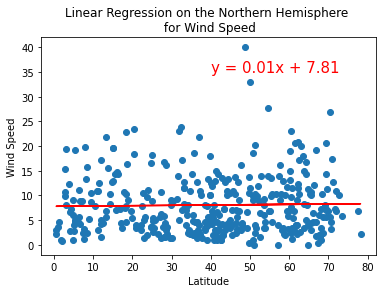

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',\
                       'Wind Speed',(40,35))

In [78]:
## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

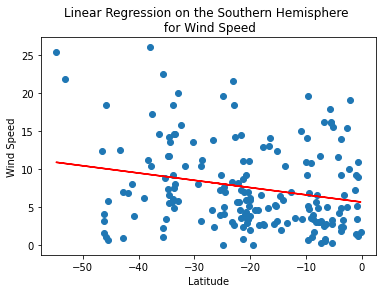

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,35))

In [1]:
### Google Maps and Places API

In [4]:
# continue in VacationPy